In [1]:
import os
from shutil import rmtree
from src.test_problem import setup_solver
from src import nk_driver

import xarray as xr
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
wdir = os.path.join(os.getenv("HOME"), "test_run_dye_decay_wdir")
if os.path.exists(wdir):
    if os.path.isfile(wdir):
        os.remove(wdir)
    else:
        rmtree(wdir)

In [3]:
common_args = ["--workdir", wdir, "--tracer_module_names", "dye_decay_{suff}:001:010:100"]

In [4]:
setup_solver.main(setup_solver.parse_args(common_args + ["--fp_cnt", "1"]))

2020-06-03 16:18:33,898:57659:setup_solver.py:main:args.cfg_fname="/Users/klindsay/codes/Newton-Krylov_OOC/input/test_problem/newton_krylov.cfg"
2020-06-03 16:18:33,906:57659:gen_invoker_script.py:gen_invoker_script:generating /Users/klindsay/test_run_dye_decay_wdir/nk_driver.sh
2020-06-03 16:18:33,912:57659:setup_solver.py:main:grid_weight_fname="/Users/klindsay/test_run_dye_decay_wdir/depth_axis_test.nc"
2020-06-03 16:18:33,943:57659:setup_solver.py:main:fp_iter=0
2020-06-03 16:18:38,533:57659:setup_solver.py:main:init_iterate_fname="/Users/klindsay/test_run_dye_decay_wdir/gen_init_iterate/init_iterate.nc"


In [5]:
def plot_all_vars(ds):
    print(ds)
    for varname in ds.data_vars:
        if "bounds" in varname:
            continue
        plot_da = ds[varname].isel(time=slice(1,-1)) if "time" in ds[varname].dims else ds[varname]
        if sum([dimlen>1 for dimlen in plot_da.shape]) > 1:
            cbar_kwargs = {"orientation": "horizontal"}
            plt_ret = plot_da.plot(cbar_kwargs=cbar_kwargs)
        else:
            plt_ret = plot_da.plot()
        plt.title(varname)
        if "fcn_norm" in varname or "increment_norm" in varname:
            plt.yscale("log")
        plt.show()

<xarray.Dataset>
Dimensions:        (depth: 30)
Dimensions without coordinates: depth
Data variables:
    dye_decay_001  (depth) float64 ...
    dye_decay_010  (depth) float64 ...
    dye_decay_100  (depth) float64 ...
Attributes:
    history:  2020-06-03 16:18:33: created by src.test_problem.model_state.Mo...


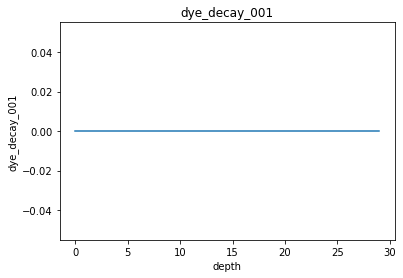

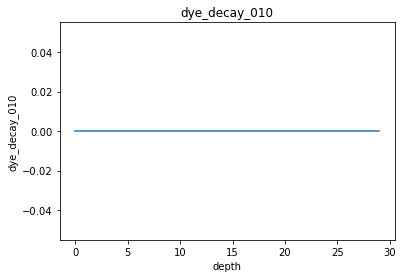

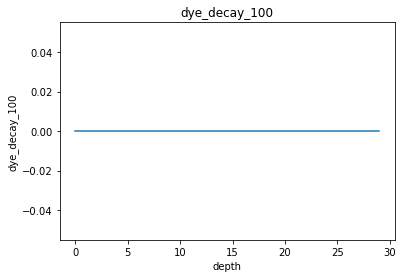

In [6]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "init_iterate_00.nc")) as ds:
    plot_all_vars(ds)

<xarray.Dataset>
Dimensions:                   (depth: 30, depth_edges: 31, nbnds: 2, time: 101)
Coordinates:
  * time                      (time) object 0001-01-01 00:00:00 ... 0002-01-01 00:00:00
  * depth                     (depth) float64 5.0 15.01 25.07 ... 825.0 875.0
  * depth_edges               (depth_edges) float64 0.0 10.0 ... 850.0 900.0
Dimensions without coordinates: nbnds
Data variables:
    depth_bounds              (depth, nbnds) float64 ...
    bldepth                   (time) float64 ...
    mixing_coeff              (time, depth_edges) float64 ...
    dye_decay_001             (time, depth) float64 ...
    dye_decay_001_time_mean   (depth) float64 ...
    dye_decay_001_time_anom   (time, depth) float64 ...
    dye_decay_001_time_delta  (depth) float64 ...
    dye_decay_001_depth_int   (time) float64 ...
    dye_decay_010             (time, depth) float64 ...
    dye_decay_010_time_mean   (depth) float64 ...
    dye_decay_010_time_anom   (time, depth) float64 ...
  

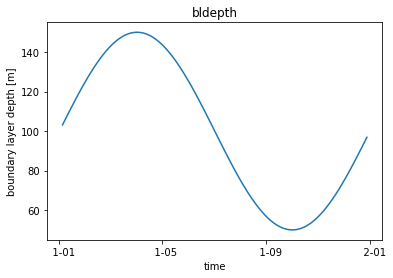

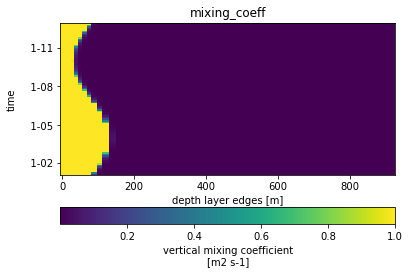

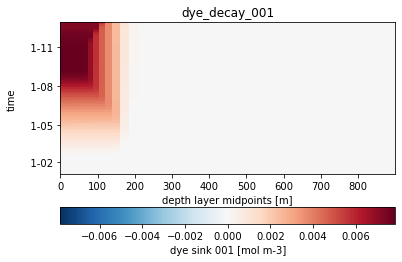

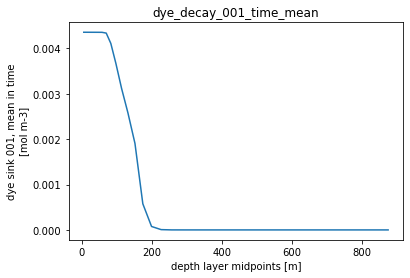

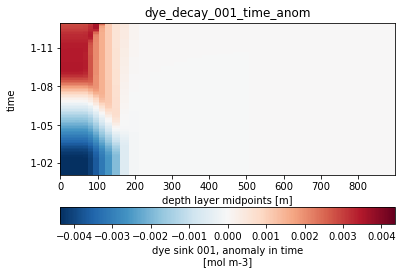

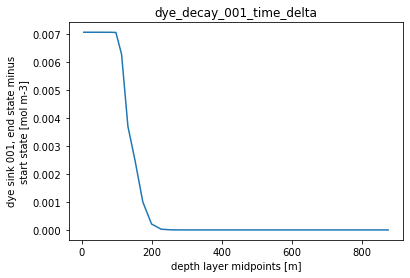

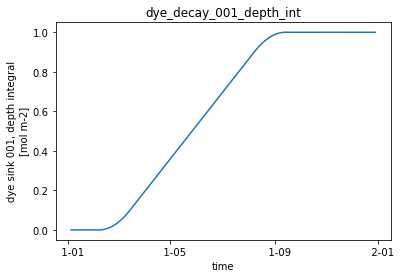

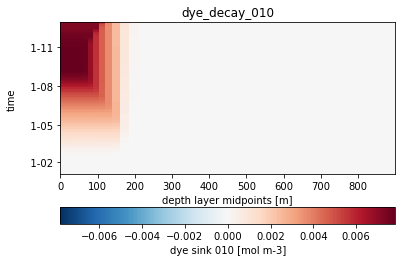

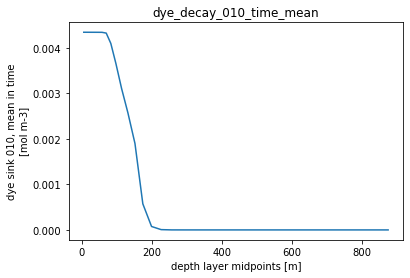

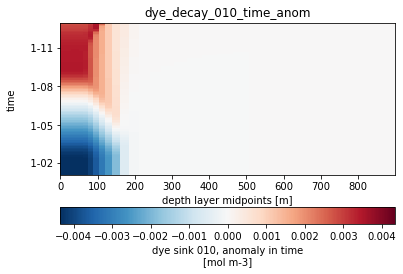

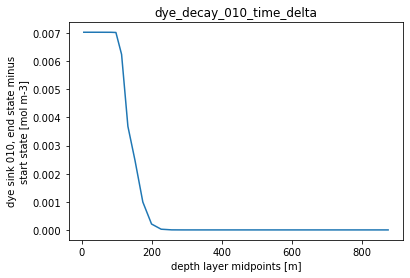

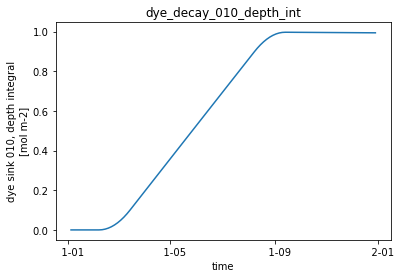

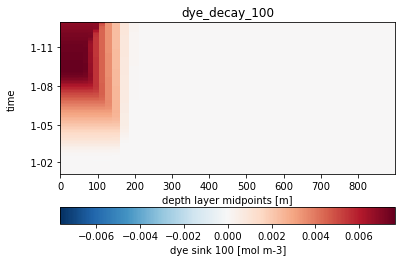

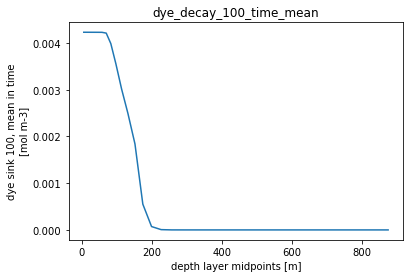

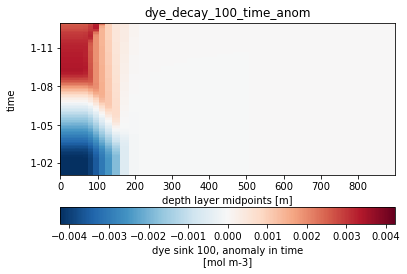

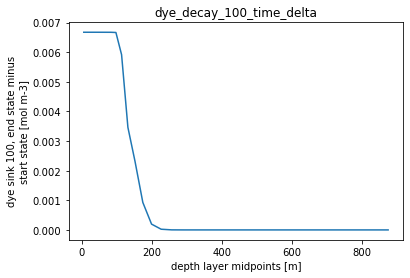

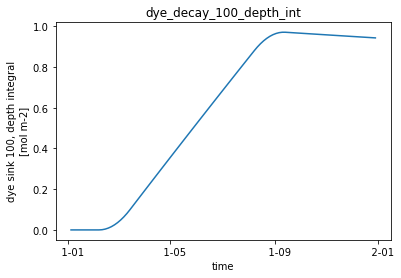

In [7]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "hist_00.nc")) as ds:
    plot_all_vars(ds)

<xarray.Dataset>
Dimensions:        (depth: 30)
Dimensions without coordinates: depth
Data variables:
    dye_decay_001  (depth) float64 ...
    dye_decay_010  (depth) float64 ...
    dye_decay_100  (depth) float64 ...
Attributes:
    history:  2020-06-03 16:18:38: created by src.test_problem.model_state.Mo...


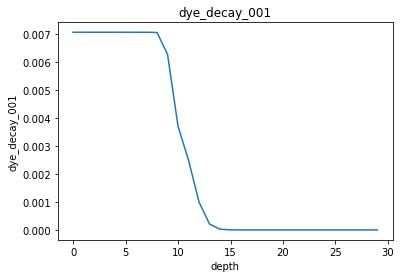

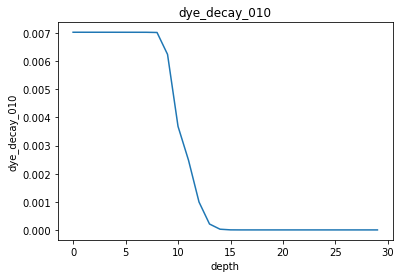

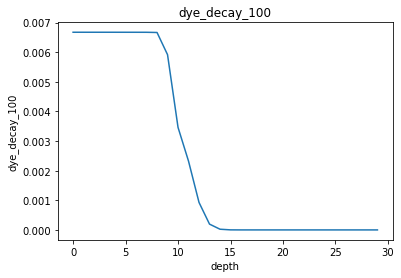

In [8]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "fcn_00.nc")) as ds:
    plot_all_vars(ds)

<xarray.Dataset>
Dimensions:        (depth: 30)
Dimensions without coordinates: depth
Data variables:
    dye_decay_001  (depth) float64 ...
    dye_decay_010  (depth) float64 ...
    dye_decay_100  (depth) float64 ...
Attributes:
    history:  2020-06-03 16:18:38: created by src.test_problem.model_state.Mo...


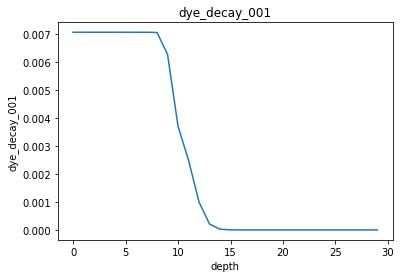

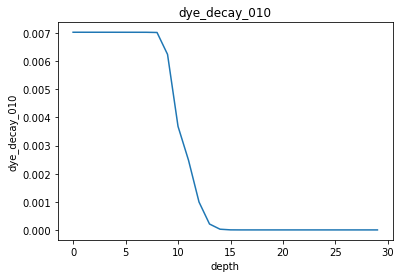

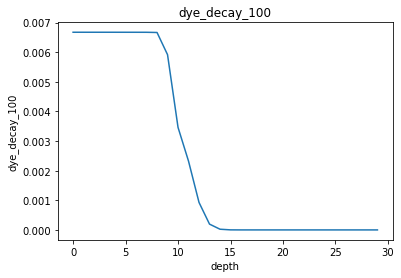

In [9]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "init_iterate.nc")) as ds:
    plot_all_vars(ds)

In [10]:
nk_driver.main(nk_driver.parse_args(common_args + ["--persist"]))

2020-06-03 16:18:42,920:57659:model_config.py:__init__:loading content from /Users/klindsay/codes/Newton-Krylov_OOC/input/test_problem/tracer_module_defs.yaml
2020-06-03 16:18:42,939:57659:model_config.py:check_shadow_tracers:tracer module phosphorus has po4_s as a shadow for po4
2020-06-03 16:18:42,942:57659:model_config.py:check_shadow_tracers:tracer module phosphorus has dop_s as a shadow for dop
2020-06-03 16:18:42,943:57659:model_config.py:check_shadow_tracers:tracer module phosphorus has pop_s as a shadow for pop
2020-06-03 16:18:42,947:57659:model_config.py:__init__:reading depth_delta from /Users/klindsay/test_run_dye_decay_wdir/depth_axis_test.nc for grid_weight
2020-06-03 16:18:42,953:57659:nk_driver.py:main:using class ModelState from src.test_problem.model_state for model state
2020-06-03 16:18:42,956:57659:solver_state.py:__init__:"Newton" iteration now 0
2020-06-03 16:18:50,344:57659:tracer_module_state_base.py:log_vals:iteration=00,iterate,mean[dye_decay_001]=1.110445e-0

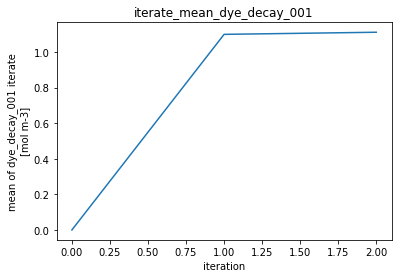

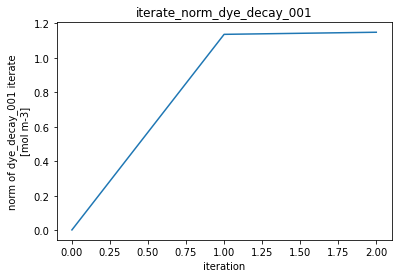

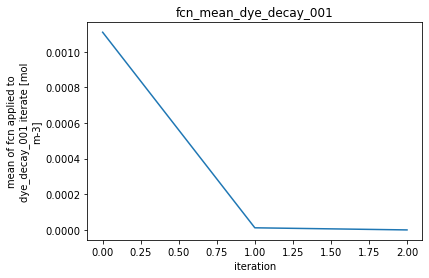

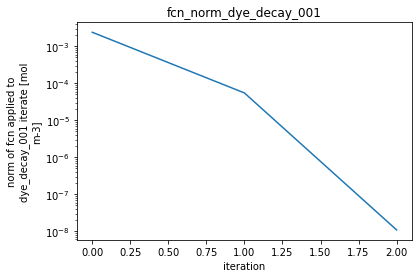

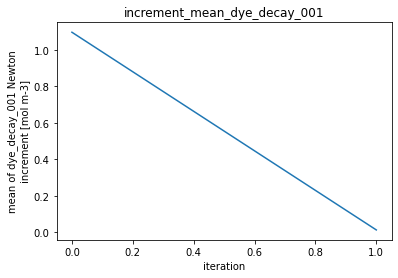

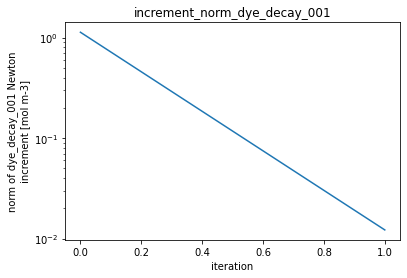

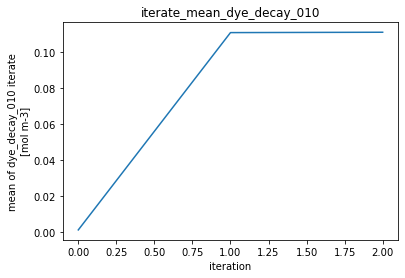

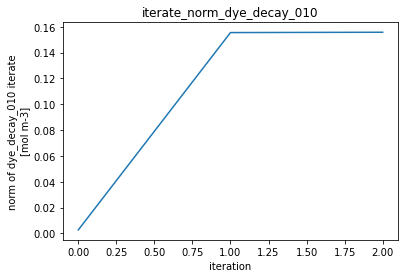

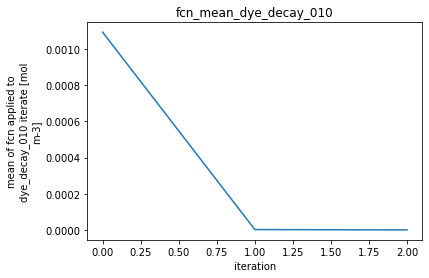

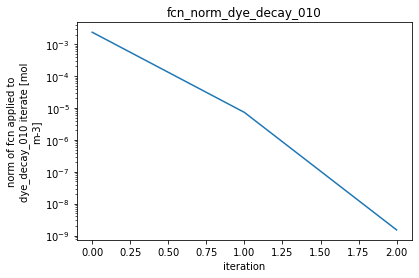

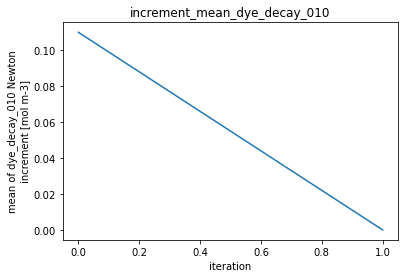

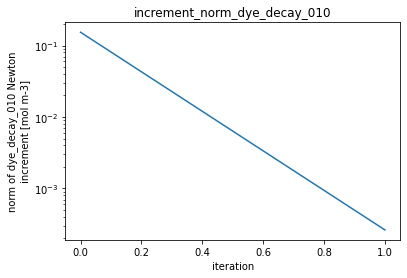

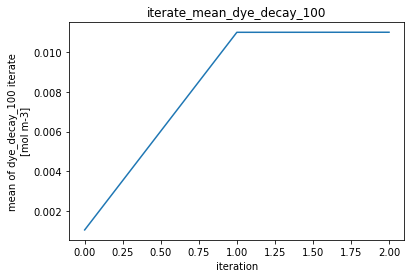

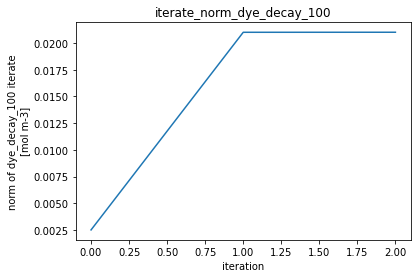

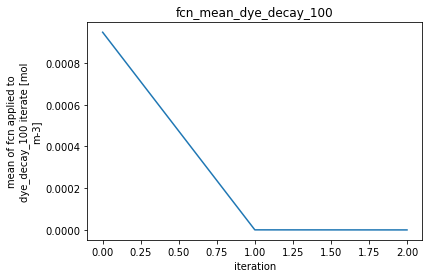

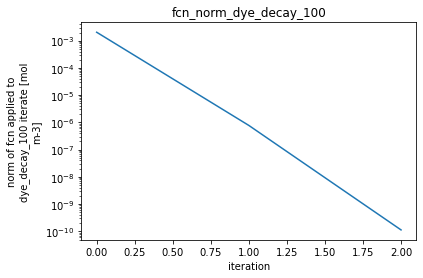

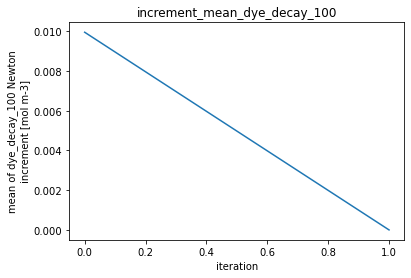

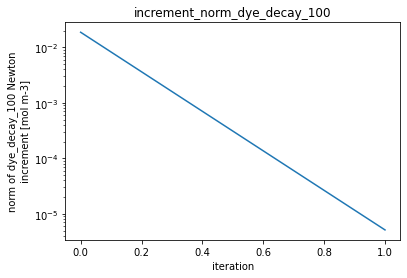

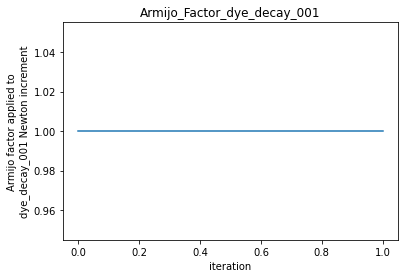

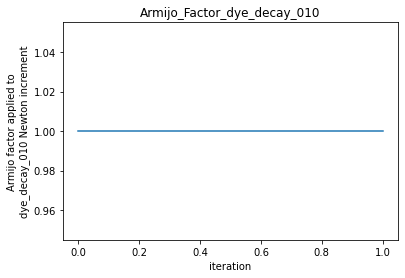

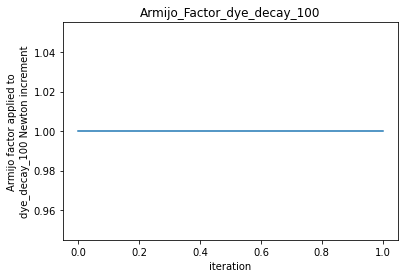

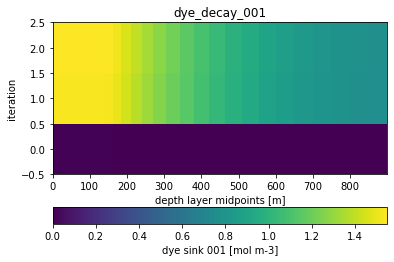

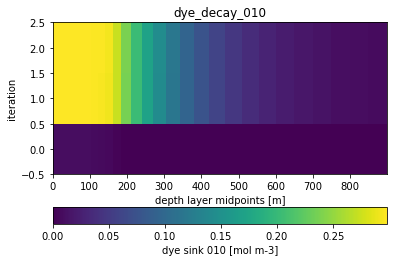

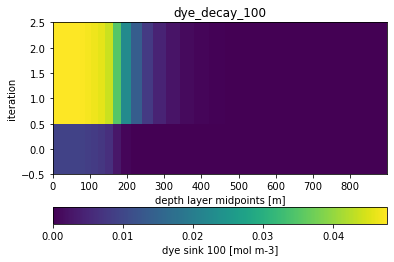

In [11]:
with xr.open_dataset(os.path.join(wdir, "Newton_stats.nc")) as ds:
    plot_all_vars(ds)
    iterations = len(ds["iteration"])

In [12]:
iter_str_final = f"{iterations-1:02d}"
print(iter_str_final)

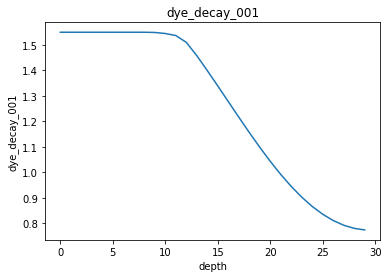

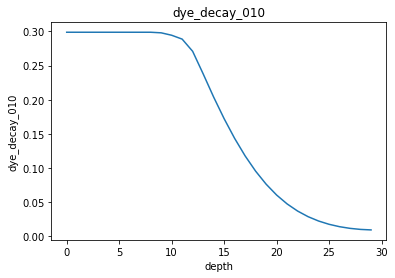

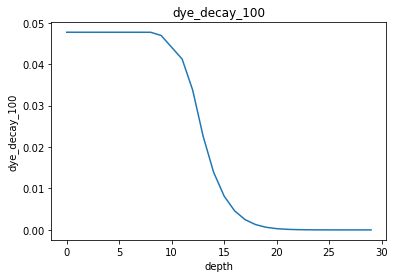

In [13]:
with xr.open_dataset(os.path.join(wdir, f"iterate_{iter_str_final}.nc")) as ds:
    plot_all_vars(ds)

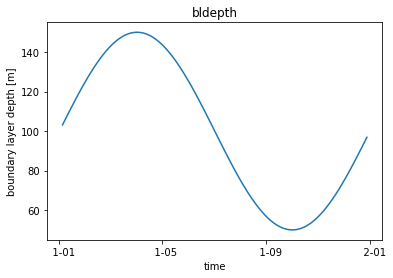

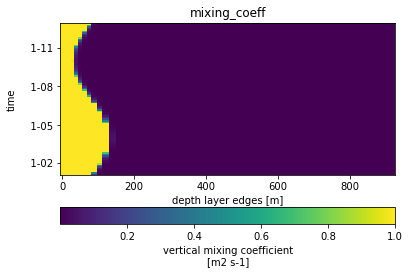

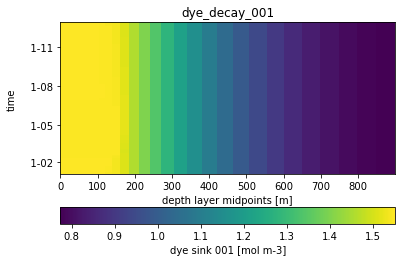

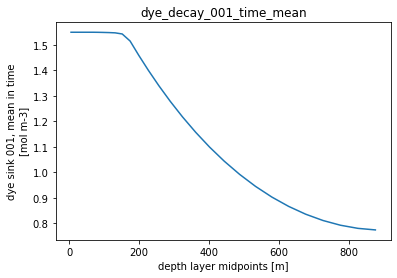

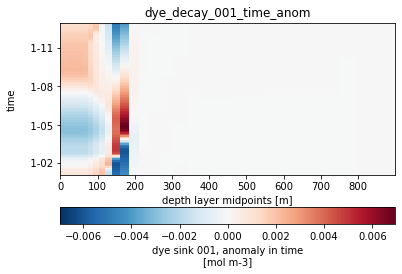

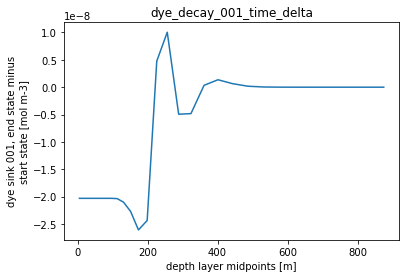

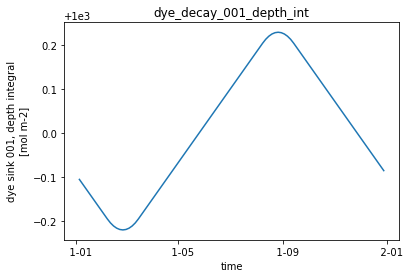

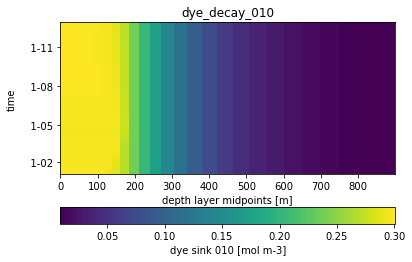

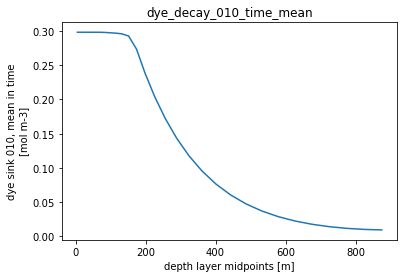

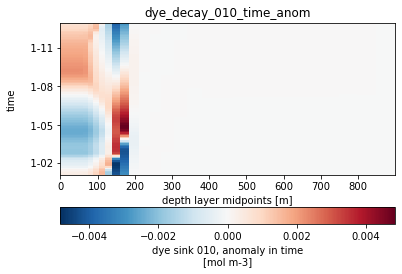

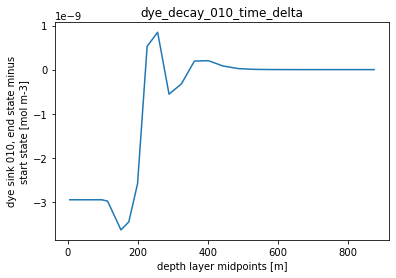

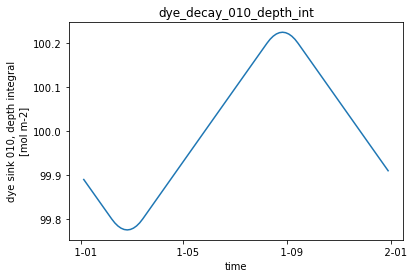

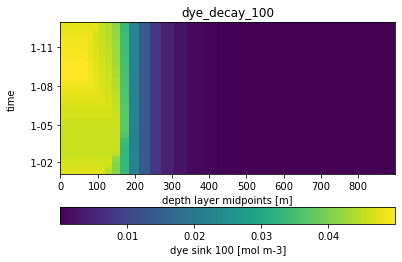

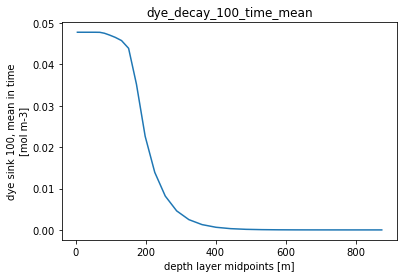

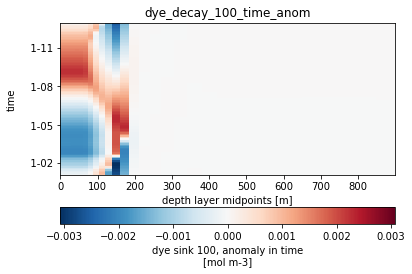

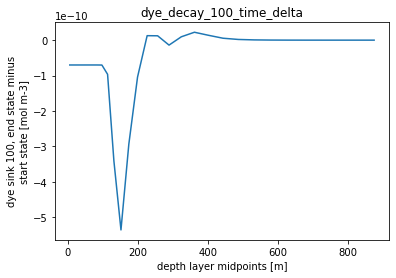

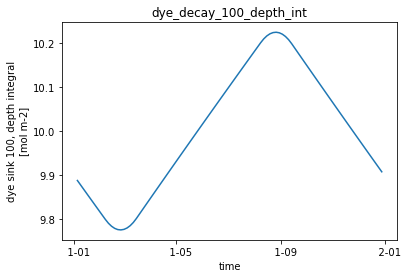

In [14]:
with xr.open_dataset(os.path.join(wdir, f"hist_{iter_str_final}.nc")) as ds:
    plot_all_vars(ds)

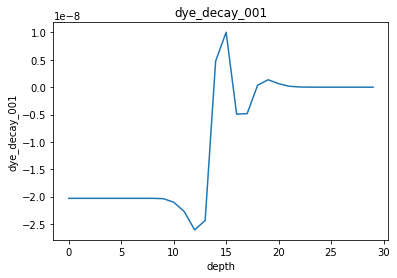

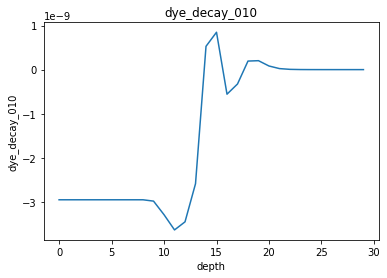

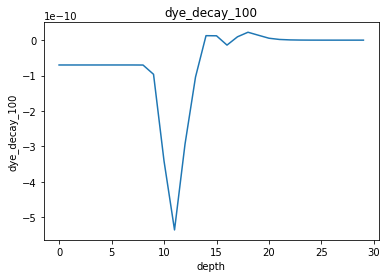

In [15]:
with xr.open_dataset(os.path.join(wdir, f"fcn_{iter_str_final}.nc")) as ds:
    plot_all_vars(ds)